In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


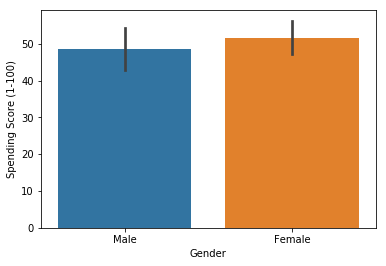

In [4]:
sns.barplot(x=dataset['Gender'] , y = dataset['Spending Score (1-100)'])

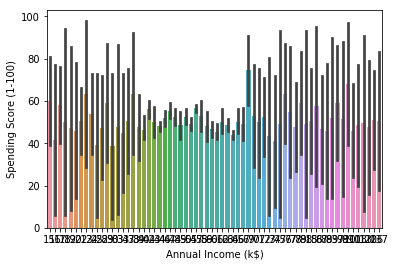

In [5]:
sns.barplot(x=dataset['Annual Income (k$)'] , y = dataset['Spending Score (1-100)'])

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
dataset['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [8]:
dataset['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

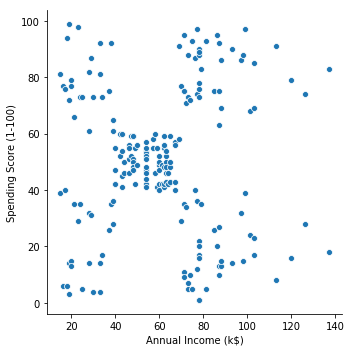

In [9]:
sns.relplot(x='Annual Income (k$)' , y = 'Spending Score (1-100)',data=dataset[:200] , kind="scatter")

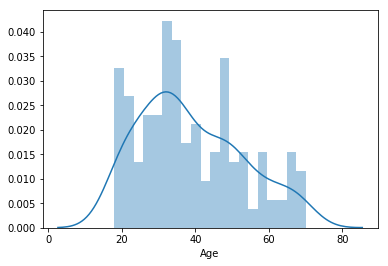

In [10]:
sns.distplot(dataset['Age'],bins=20)

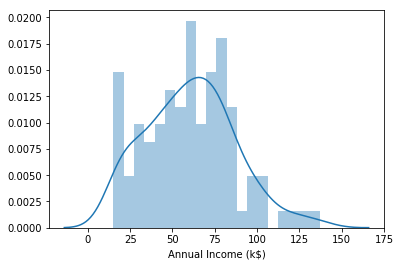

In [11]:
sns.distplot(dataset['Annual Income (k$)'],bins=20)

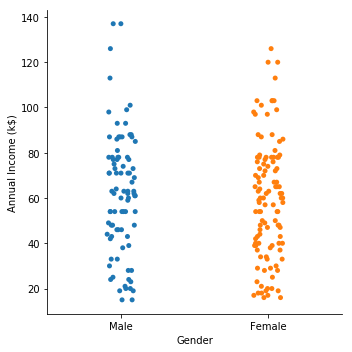

In [12]:
sns.catplot(x="Gender",y='Annual Income (k$)' , data=dataset[::])

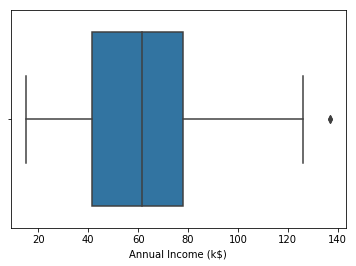

In [13]:
sns.boxplot(dataset['Annual Income (k$)'])

In [14]:
def gender2number(x): # Male: 0 Female: 1
    if x=="Male":
        return 0
    else:
        return 1

In [15]:
dataset['Gender'] = dataset['Gender'].apply(lambda x:gender2number(x))

In [16]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


<function matplotlib.pyplot.show(*args, **kw)>

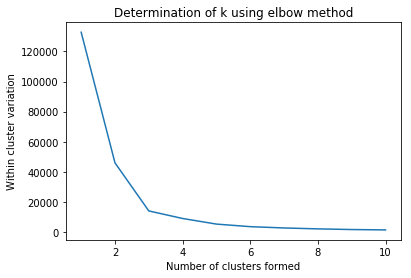

In [27]:
X = dataset.iloc[:,[1,4]] #SO FOR GENDER VS SCORE, WE NEED TO FORM 2 CLUSTERS AS ELBOW IS AT 3
from sklearn.cluster import KMeans
wcv = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++') # if we want to use kmeans++ for better results, we can be putting init parameter as km++
    kmeans.fit(X)
    wcv.append(kmeans.inertia_) #inertia method gives wcv score of the model

plt.plot(range(1,11) , wcv)
plt.title("Determination of k using elbow method")
plt.xlabel('Number of clusters formed')
plt.ylabel('Within cluster variation')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

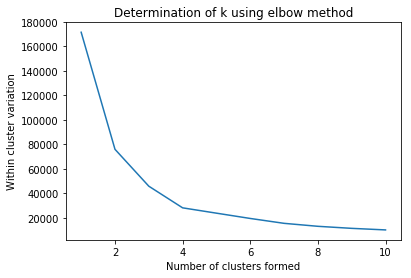

In [29]:
X = dataset.iloc[:,[2,4]] #SO FOR AGE VS SCORE, WE NEED TO FORM 4 CLUSTERS AS ELBOW IS AT 4
from sklearn.cluster import KMeans
wcv = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++') # if we want to use kmeans++ for better results, we can be putting init parameter as km++
    kmeans.fit(X)
    wcv.append(kmeans.inertia_) #inertia method gives wcv score of the model

plt.plot(range(1,11) , wcv)
plt.title("Determination of k using elbow method")
plt.xlabel('Number of clusters formed')
plt.ylabel('Within cluster variation')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

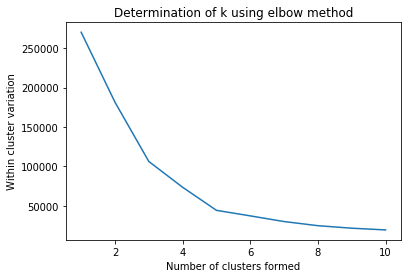

In [41]:
X = dataset.iloc[:,[3,4]].values #SO FOR income VS SCORE, WE NEED TO FORM 2 CLUSTERS AS ELBOW IS AT 5
from sklearn.cluster import KMeans
wcv = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++') # if we want to use kmeans++ for better results, we can be putting init parameter as km++
    kmeans.fit(X)
    wcv.append(kmeans.inertia_) #inertia method gives wcv score of the model

plt.plot(range(1,11) , wcv)
plt.title("Determination of k using elbow method")
plt.xlabel('Number of clusters formed')
plt.ylabel('Within cluster variation')
plt.show

In [42]:
# SO NOW PICKING 5 CLUSTERS FOR INCOME VS SCORE 
kmeans = KMeans(n_clusters = 5 , init = 'k-means++')
y_kmeans = kmeans.fit_predict(X) # y is a numpy array with prediction for each example in range 0 to n_clusters-1

In [43]:
y_kmeans

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

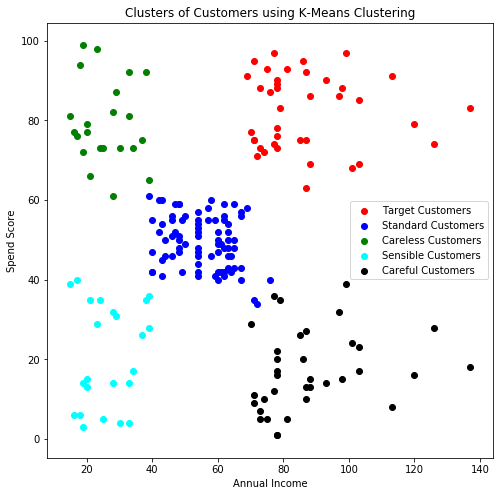

In [49]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'Target Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Standard Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Careless Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'black', label = 'Careful Customers')
plt.title('Clusters of Customers using K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spend Score')
plt.legend()
plt.show()

In [45]:
type(X) #using .values with iloc converts it to numpy array. be careful, many things work with one and not with other

numpy.ndarray

In [51]:
#ALL DONE

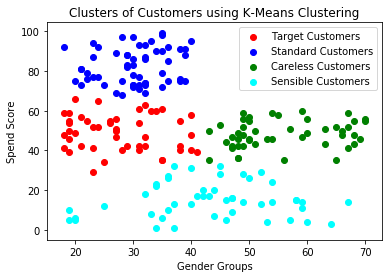